In [86]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [87]:
dataset_test = pd.read_csv('../data/raw/test.csv')
dataset_test.head()

,ID,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,105001,0.961524,40,0,0.484671,12100.0,11,0,1,0,0.0
1,105002,0.729196,71,0,0.542329,10500.0,13,0,1,0,0.0
2,105003,0.025195,49,0,27.000000,NaN,2,0,0,0,NaN
3,105004,0.106295,58,0,0.156893,5200.0,10,0,1,1,0.0
4,105005,0.003515,68,0,0.000299,10045.0,6,0,0,0,0.0


Proceso de preparacion de datos para predecir

In [88]:
with open('../artifacts/feature_eng_configs.pkl','rb') as f:
    feature_eng_config = pickle.load(f)

feature_eng_config

{'Ing_mensual_imputado': 6636, 'No_dependiente_imputado': 1}

In [89]:
#Removemos la columna ID

dataset_test.drop(['ID'], axis=1, inplace=True)

# Imputamos Mto Ingreso Mensual

dataset_test['Mto_ingreso_mensual'] = dataset_test['Mto_ingreso_mensual'].fillna(feature_eng_config['Ing_mensual_imputado'])


# Imputamos Nro dependientes

dataset_test['Nro_dependiente'] = dataset_test['Nro_dependiente'].fillna(feature_eng_config['No_dependiente_imputado'])

In [90]:
dataset_test.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,0.961524,40,0,0.484671,12100.0,11,0,1,0,0.0
1,0.729196,71,0,0.542329,10500.0,13,0,1,0,0.0
2,0.025195,49,0,27.000000,6636.0,2,0,0,0,1.0
3,0.106295,58,0,0.156893,5200.0,10,0,1,1,0.0
4,0.003515,68,0,0.000299,10045.0,6,0,0,0,0.0


Tratamiento de outliers

Prct_uso_tc


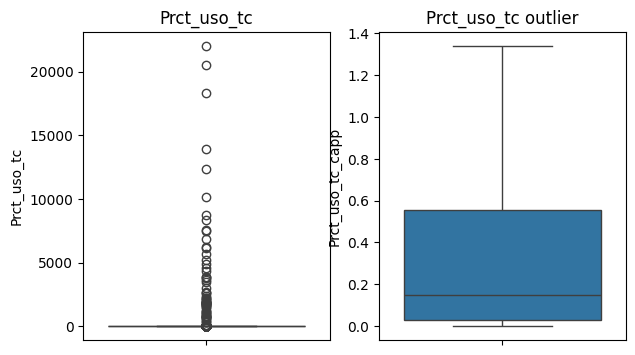

Edad


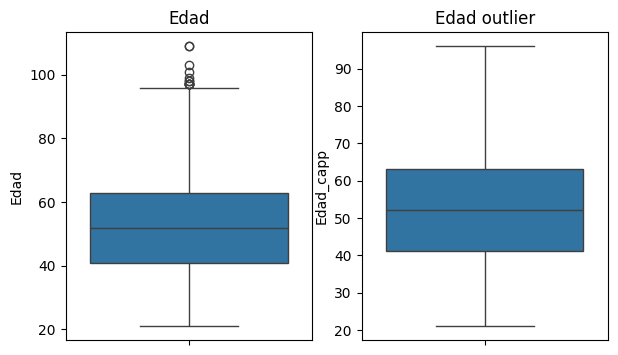

Prct_deuda_vs_ingresos


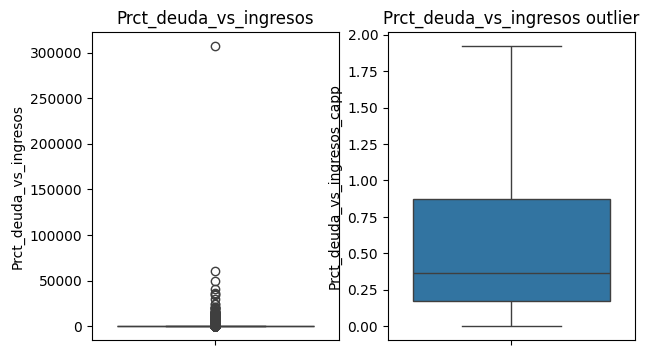

Mto_ingreso_mensual


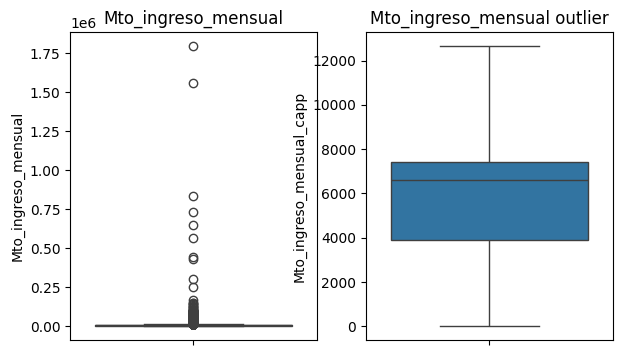

Nro_prod_financieros_deuda


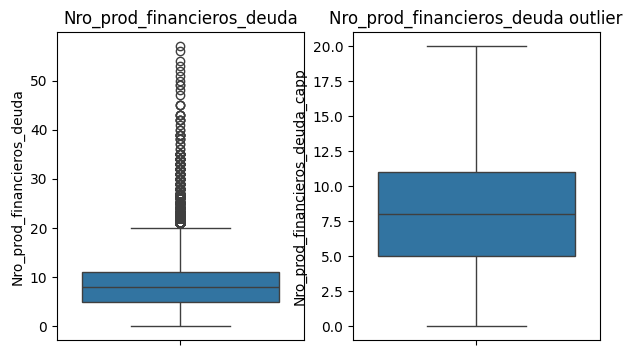

In [91]:


continuas=[col for col in dataset_test.columns if(dataset_test[col].dtypes in ['float64','int64'])and (len(dataset_test[col].unique())>30)]

continuas_outliers=continuas

for col in continuas_outliers:

    IQR=dataset_test[col].quantile(0.75)-dataset_test[col].quantile(0.25)
    IQR
    LL=dataset_test[col].quantile(0.25)-1.5*IQR
    UL=dataset_test[col].quantile(0.75)+1.5*IQR

    dataset_test[col+'_capp']=np.where(dataset_test[col]>UL,UL,np.where(dataset_test[col]<LL,LL,dataset_test[col]))
    
    print(col)

    plt.figure(figsize=(7,4))

    plt.subplot(121)
    plt.title(col)
    sns.boxplot(y=dataset_test[col])

    plt.subplot(122)
    plt.title(col + ' outlier')
    sns.boxplot(y=dataset_test[col+'_capp'])
 
   
    plt.show()

In [92]:
dataset_test['Prct_uso_tc'] = dataset_test['Prct_uso_tc_capp']
dataset_test['Edad'] = dataset_test['Edad_capp']
dataset_test['Prct_deuda_vs_ingresos'] = dataset_test['Prct_deuda_vs_ingresos_capp']
dataset_test['Mto_ingreso_mensual'] = dataset_test['Mto_ingreso_mensual_capp']
dataset_test['Nro_prod_financieros_deuda'] = dataset_test['Nro_prod_financieros_deuda_capp']

In [93]:
dataset_test=dataset_test.drop(['Prct_uso_tc_capp'], axis=1)
dataset_test=dataset_test.drop(['Edad_capp'], axis=1)
dataset_test=dataset_test.drop(['Prct_deuda_vs_ingresos_capp'], axis=1)
dataset_test=dataset_test.drop(['Mto_ingreso_mensual_capp'], axis=1)
dataset_test=dataset_test.drop(['Nro_prod_financieros_deuda_capp'], axis=1)

Estandarizacion con objeto scaler de train

In [94]:
with open('../artifacts/std_scaler.pkl','rb') as f:
    std_scaler = pickle.load(f)

Cargamos modelo entranado

In [95]:
with open('../models/random_forest_v1.pkl','rb') as f:
    model = pickle.load(f)

    model

In [96]:
X_data_test_std = std_scaler.transform(dataset_test)
data_test_predicts = model.predict(X_data_test_std)

data_test_predicts

c:\Users\msantizo\AppData\Local\anaconda3\envs\venv-mini-proyecto2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])